In [1]:
from math import pi, sqrt
import numpy as np
import handcalcs.render

handcalcs.set_option("latex_block_start", "$")
handcalcs.set_option("latex_block_end", "$")
handcalcs.set_option("math_environment_end", "aligned")
handcalcs.set_option("use_scientific_notation",True)



In [2]:
#help(handcalcs.set_option)

# llc design methode
https://bbs.dianyuan.com/upload/community/2013/12/01/1385867010-65563.pdf
<br><br><br>
https://www.infineon.com/dgdl/Infineon-Design_Guide_evaluation_board_EVAL_600W_12V_LLC_P7-ApplicationNotes-v01_00-EN.pdf?fileId=8ac78c8c7d0d8da4017d285e4c71354a
<br><br><br>
https://www.ti.com/lit/an/slua923/slua923.pdf?ts=1744870090235&ref_url=https%253A%252F%252Fwww.ti.com%252Fproduct%252FUCC25660
<br><br><br>
specification
<br><br><br>
https://arrival.com/elements/dc-dc-400-12v-3kw
<br><br><br>
https://www.deltaww.com/en-US/products/ev-dc-dc-converters/ALL/
<br><br><br>
https://www.bosch-mobility.com/en/solutions/power-electronics/high-voltage-dc-dc-converter-generation-3evo
<br><br><br>
inp 360/400
https://www.powerlandtech.com/index.php/product-detail/158

# LLC tank pre-design calculations

See
<br>
https://bbs.dianyuan.com/upload/community/2013/12/01/1385867010-65563.pdf
<br>
page<br>
$$
M_g = \left| \frac{L_n \cdot f_n^2}{\left[(L_n + 1) \cdot f_n^2 - 1\right] + j\left[(f_n^2 - 1) \cdot f_n \cdot Q_e \cdot L_n\right]} \right|
$$


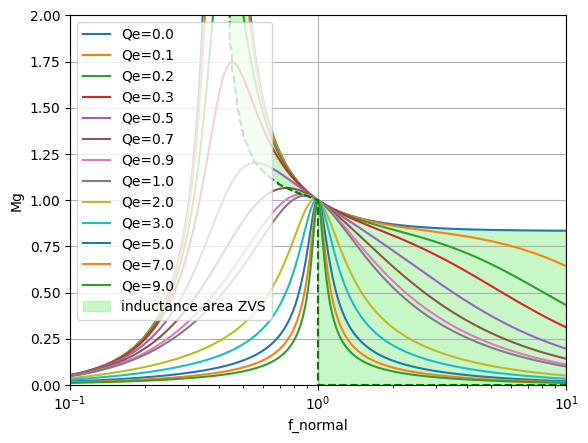

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def calculate_Mg(Ln, fn, Qe):
    numerator = Ln * fn**2
    denominator_real = (Ln + 1) * fn**2 - 1
    denominator_imag = (fn**2 - 1) * fn * Qe * Ln
    denominator = np.sqrt(denominator_real**2+ denominator_imag**2)
    Mg = abs(numerator / denominator)
    return Mg
Ln = 5 # Lm/Lr
fn = np.arange(0.1,10+0.01,0.01)

np.arange(0,0.9,0.1)
Qe =np.array([1,2,3,5,7,9])
Qearr = np.array([0]+list(Qe*0.1)+list(Qe))
for Qe in Qearr:

  Mg = calculate_Mg(Ln, fn, Qe)


  plt.plot(fn, Mg, label = f"Qe={Qe:.1f}")



Mgmax = []
frmgmax =[]
mg0 = None

np.arange(0,0.9,0.1)
Qe =np.array([1,2,3,5,7,9])
Qearr = np.array([0]+list(Qe*0.1)+list(Qe))
for Qe in np.arange(0,1,0.01):
  Mg = calculate_Mg(Ln, fn, Qe)
  i=np.argmax(Mg)
  Mgmax.append(Mg[i])
  frmgmax.append(fn[i])
  if mg0 is None :
    mg0 = Mg
frmgmax = np.array(frmgmax)
m= frmgmax<0.95
frmgmax = frmgmax[m]
Mgmax = np.array(Mgmax)
Mgmax = Mgmax[m]
frmgmax = np.array(frmgmax.tolist()+[1,1,10])
Mgmax = np.array(Mgmax.tolist()+[1,0,0])
plt.plot(frmgmax,Mgmax , c="g", linestyle="--"
         #,label = "ZVS region"
         )

m = fn> frmgmax.min()
fn = fn[m]
mg0= mg0[m]
from scipy.interpolate import interp1d
interp_y2 = interp1d(frmgmax,Mgmax, kind='linear', fill_value='extrapolate')
Mgmax_interp = interp_y2(fn)

plt.fill_between(fn, mg0, Mgmax_interp, color='lightgreen', alpha=0.5, label='inductance area ZVS')

plt.legend()
plt.xscale("log")
#plt.yscale("log")
plt.grid()#wich= "both")
plt.xlabel("f_normal")
plt.ylabel("Mg")
plt.ylim([0,2])
plt.xlim([1e-1, 10])
plt.show()

In [4]:
import inspect

def print2(*args):
    frame = inspect.currentframe().f_back
    names = {id(v): k for k, v in frame.f_locals.items()}
    for arg in args:
        name = names.get(id(arg), '<unknown>')
        print(f"{name} = {arg}")
aa = 0.25
bb = 0.87

print2(aa,bb)


aa = 0.25
bb = 0.87


### My example

In [5]:
from math import pi, sqrt
import numpy as np
import handcalcs.render

import handcalcs.render

handcalcs.set_option("latex_block_start", "$")
handcalcs.set_option("latex_block_end", "$")


In [6]:
Vinmin = 380
Vinnom = 395
Vinmax = 410

#Vinmin = 320
Vinmin = 320
Vinnom = 370
Vinmax = 400

In [7]:
%%render

# Input voltage

Vinmin = 360
Vinnom = 380
Vinmax = 400


# Output Voltage
Vomin = 42
Vonom = 48
Vomax = 54

# Power
Power = 1200

# Central Frequencey
fnom = 100e3

<IPython.core.display.Latex object>

In [8]:
48*15/13.5

53.333333333333336

In [9]:
%%render
n = Vinnom/(Vonom*2)

<IPython.core.display.Latex object>

In [10]:
#alternative
#https://product.tdk.com/system/files/dam/doc/product/ferrite/ferrite/ferrite-acc/data_sheet/80/db/fer/etd_49_25_16.pdf

In [11]:
%%render
n = round(n)

<IPython.core.display.Latex object>

In [12]:
%%render
Vf=0.2 # drop voltage in the mos
efficiency = 0.95
loss = 1-efficiency
Ionom = Power/Vonom
Vloss = ((Power*loss)/efficiency)/Ionom
#print2(Ionom)

<IPython.core.display.Latex object>

In [13]:
%%render
margin = 0.01
mgmin = n*(Vomin*(1-margin)+Vf)/(Vinmax/2)
#mgmin = np.round(mgmin, 2)
#print2(mgmin)
mgmax = n*(Vomax*(1+margin)+Vf+Vloss)/(Vinmin/2)
#mgmax = np.round(mgmax, 2)
#print2(mgmax)

# 110% load
mgmax110 = mgmax*110/100
#mgmax110 = np.round(mgmax110, 2)
#print2(mgmax110)

<IPython.core.display.Latex object>

In [136]:
from copy import copy
#data_ = copy(data)

In [137]:
def LLC_from_Qe_Ln(Lnc, Qec):

  f=np.arange(0.2,5,0.0001)
  mg = calculate_Mg(Lnc,f, Qec)
  Mg_c= mg.max()




  i = np.abs(mg-mgmin).argmin()
  i = np.abs(mg-mgmax110).argmin()
  mg_max_close= mg[i]

  fn_min= f[i]
  #print2(fn_min)


  #mg = calculate_Mg(Lnc,f, Qec)
  mg = calculate_Mg(Lnc,f, 0)
  i = np.abs(mg-mgmin).argmin()
  fn_max = f[i]
  mg_min_close= mg[i]

  _='''
  mask1= f>fn_min
  mask2= f<fn_max
  mask = mask1 & mask2
  f2 = f[mask]
  mg2 = mg[mask]

  mask1 = mg2>mgmin
  mask2 = mg2<mgmax110
  mask = mask1 & mask2
  f2 = f2[mask]
  mg2 = mg2[mask]

  #print2(mg2)
  VmMax= mg2*2*np.sqrt(2)*Vinmax/(pi)
  #print2(Vinmax, VmMax, mg2)
  Ae = 211e-6
  fsw = f2*fnom
  Bpeak = VmMax/(4.44*fsw*n*Ae)
  # print2(fsw,  n, Ae)
  try:
    Bpeak_max = Bpeak.max()
  except:
    Bpeak_max = np.nan
  #print(Bpeak_max)
  '''






  # 100 load

  Renom = 8*n**2*Vonom / (pi**2*Ionom)
  Renom = np.round(Renom, 1)
  # print2(Renom)

  # 110% load

  Re110 = 8*n**2*Vonom / (pi**2*Ionom*1.1)
  #Re110 = np.round(Re110, 1)
  # print2(Re110)
  P_re_110 = (Vinnom/2)**2/Renom
  #P_re_110 = np.round(P_re_110, 0)
  # print2(P_re_110)



  Cr_nF= 1e9/ (2*pi * Qec* fnom*Renom)




  Cr = Cr_nF
  Cr = np.round(Cr, 1)


  Lr = 1/ ((2*pi * fnom)**2*Cr*1e-9)
  Lr_uH = Lr *1e6 # uH
  Lr_uH = np.round(Lr_uH, 1)
  #Lr = 60 # choise

  Lm = Lr*Lnc
  #Lm = np.round(Lm, 1)
  Lm_uH = Lm *1e6 # uH
  Lm_uH = np.round(Lm_uH, 1)








  fsw_min = fn_min*fnom
  fsw_min = np.round(fsw_min, 2)

  fsw_max = fn_max*fnom
  fsw_max = np.round(fsw_max, 2)




  wmin= 2*pi * fsw_min
  wmax= 2*pi * fsw_max
  #print2(fsw_min, Lm)

  # The RMS magnetizing current (Im) at fsw_min
  Im = 2*np.sqrt(2)*n*Vonom/(pi*Lm*wmin)

  # The primary-side RMS load current (Ioe) with a 110% overload i
  Io= Ionom
  Ioe= 1.1*pi*Io/(n*2*np.sqrt(2))


  # The resonant circuit’s current (Ir)
  Ir = np.sqrt(Im**2+Ioe**2)


  Ae = 211e-6
  le = 114e-3
  ue=188
  u0= 4*pi*1e-7

  Bpeak_max = 1000*(Im*u0*ue*n/le)
  Hmax = Im*n/le
  return Lm_uH,Lr_uH ,Cr_nF, fn_min, fn_max, fsw_min, fsw_max, Ioe ,  Im, Ir, Bpeak_max, Hmax
Lnc, Qec = 3, 0.5
Lm_uH,Lr_uH ,Cr_nF, fn_min, fn_max, fsw_min, fsw_max, Ioe ,  Im, Ir, Bpeak_max, Hmax = LLC_from_Qe_Ln(Lnc, Qec)
print2(Lm_uH,Lr_uH ,Cr_nF, fn_min, fn_max, fsw_min, fsw_max, Ioe ,  Im, Ir, Bpeak_max, Hmax)

Lm_uH = 59.5
Lr_uH = 19.8
Cr_nF = 127.83529565614086
fn_min = 0.5166999999999651
fn_max = 1.56219999999985
fsw_min = 51670.0
fsw_max = 156220.0
Ioe = 7.636205049959692
Im = 8.954624013440696
Ir = 11.768471387020433
Bpeak_max = 74.22841868156351
Hmax = 314.1973338049367


In [138]:
# CHOSE QE110 automatically
Lnc, Qec = 2,0.5
freqn =  np.arange(0.15,1.7,0.01)
Lnarr = np.arange(1,10,0.01)
Qearr = np.arange(0.1,1,0.01)
data =[]
Ln, Qe = Lnc, Qec
for Ln in Lnarr:
  for Qe in Qearr:
    Mg = calculate_Mg(Ln,freqn, Qe)
    Mg_ape = Mg.max()
    data.append( [Ln, Qe, Mg_ape])

data= np.array(data).T
print(data.shape)

arr = data[2]
i = np.argmin(np.abs(arr-mgmax110))
Lnc, Qec, Mg_ape = data.T[i]
Lnc, Qec, Mg_ape, mgmax110


(3, 81000)


(np.float64(6.730000000000005),
 np.float64(0.32999999999999985),
 np.float64(1.3998556825506145),
 1.3998432748538014)

In [139]:
arr

array([13.94422608, 12.73354743, 11.71261869, ...,  1.00593831,
        1.00578616,  1.00564123], shape=(81000,))

In [140]:
arr2=[]
#arr_ = arr-mgmax110
print2(mgmax110)
#data = np.array(data )
#data= copy(data_)
arr = data[2]
for i in np.argsort(np.abs(arr-mgmax110)):
  Lnc, Qec, Mg_ape = data.T[i]

  #print2(Lnc, Qec)#, Mg_ape, mgmax110)

  Lm_uH,Lr_uH ,Cr_nF, fn_min, fn_max, fsw_min, fsw_max, Ioe ,  Im, Ir, Bpeak_max , Hmax = LLC_from_Qe_Ln(Lnc, Qec)
  #print2(Bpeak_max)
  dic = {
    "Lnc": Lnc,
    "Qec": Qec,
    "Lm_uH": Lm_uH,
    "Lr_uH": Lr_uH,
    "Cr_nF": Cr_nF,
    "fn_min" : fn_min,
    "fn_max": fn_max,
    "fsw_min": fsw_min,
    "fsw_max": fsw_max,
    "Ioe": Ioe,
    "Im": Im,
    "Ir": Ir,
    "Mg_ape": Mg_ape,
    "Bpeak_max_mT":Bpeak_max,
    "Hmax": Hmax}
  if Mg_ape > mgmax110 and fn_min < fn_max and Lnc>=2 and Lnc < 10 :
    arr2.append(dic)
    if len(arr2) >=6:
      break
import pandas as pd
dfllcv = pd.DataFrame(arr2)
dfllcv = dfllcv.sort_values("Lnc")  .reset_index(drop = True )
dfllcv
# in https://www.tdk-electronics.tdk.com/download/540066/dbcde584d155cc270f5d5dbf1efec233/pdf-generaldefinitions.pdf
# page 3
_="""
1.2.2 Saturation magnetization BS
The saturation magnetization BS is defined as the maximum flux density attainable in a material (i.e.
for a very high field strength) at a given temperature; above this value BS, it is not possible to further
increase B(H) by further increasing H.
Technically, BS is defined as the flux density at a field strength of H = 1200 A/m. As is confirmed in
the actual magnetization curves in the chapter on “Materials”, the B(H) characteristic above
1200 A/m remains roughly constant (applies to all ferrites with high initial permeability, i.e. where
 1000)."""
_=""" In practice, to be safe, design for a bit less, like keeping
𝐻
H around 800–1000 A/m maximum, to
"""
dfprint = dfllcv.copy()
print(dfprint.T.reset_index().rename (columns = {"index":"cases"}).to_markdown(index = False)) # index = False

mgmax110 = 1.3998432748538014
| cases        |            0 |            1 |            2 |            3 |            4 |            5 |
|:-------------|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|
| Lnc          |      2.41    |      3       |      3.46    |      3.68    |      4.21    |      4.71    |
| Qec          |      0.64    |      0.55    |      0.5     |      0.48    |      0.44    |      0.41    |
| Lm_uH        |     61.1     |     65.4     |     68.6     |     70       |     73.4     |     76.5     |
| Lr_uH        |     25.4     |     21.8     |     19.8     |     19       |     17.4     |     16.2     |
| Cr_nF        |     99.8713  |    116.214   |    127.835   |    133.162   |    145.267   |    155.897   |
| fn_min       |      0.6375  |      0.6017  |      0.5707  |      0.5471  |      0.5324  |      0.5077  |
| fn_max       |      1.379   |      1.5622  |      1.7698  |      1.9035  |      2.4133  |      3.6928  |
| fsw_m

In [141]:
colors = {i/10:f"C{i}" for i in range(10)}
colors["chose"]='C9'
print(colors)

{0.0: 'C0', 0.1: 'C1', 0.2: 'C2', 0.3: 'C3', 0.4: 'C4', 0.5: 'C5', 0.6: 'C6', 0.7: 'C7', 0.8: 'C8', 0.9: 'C9', 'chose': 'C9'}


,Lnc,Qec,Lm_uH,Lr_uH,Cr_nF,fn_min,fn_max,fsw_min,fsw_max,Ioe,Im,Ir,Mg_ape,Bpeak_max_mT,Hmax
0,2.41,0.64,61.1,25.4,99.871325,0.6375,1.3790,63750.0,137900.0,7.636205,7.062273,10.401313,1.400142,58.541969,247.799037
1,3.00,0.55,65.4,21.8,116.213905,0.6017,1.5622,60170.0,156220.0,7.636205,6.991673,10.353507,1.400062,57.956738,245.321844
2,3.46,0.50,68.6,19.8,127.835296,0.5707,1.7698,57070.0,176980.0,7.636205,7.029478,10.379075,1.399923,58.270126,246.648365
3,3.68,0.48,70.0,19.0,133.161766,0.5471,1.9035,54710.0,190350.0,7.636205,7.185648,10.485474,1.400284,59.564673,252.127983
4,4.21,0.44,73.4,17.4,145.267381,0.5324,2.4133,53240.0,241330.0,7.636205,7.040795,10.386742,1.400277,58.363932,247.045433
5,4.71,0.41,76.5,16.2,155.896702,0.5077,3.6928,50770.0,369280.0,7.636205,7.080995,10.414034,1.400231,58.697164,248.455950


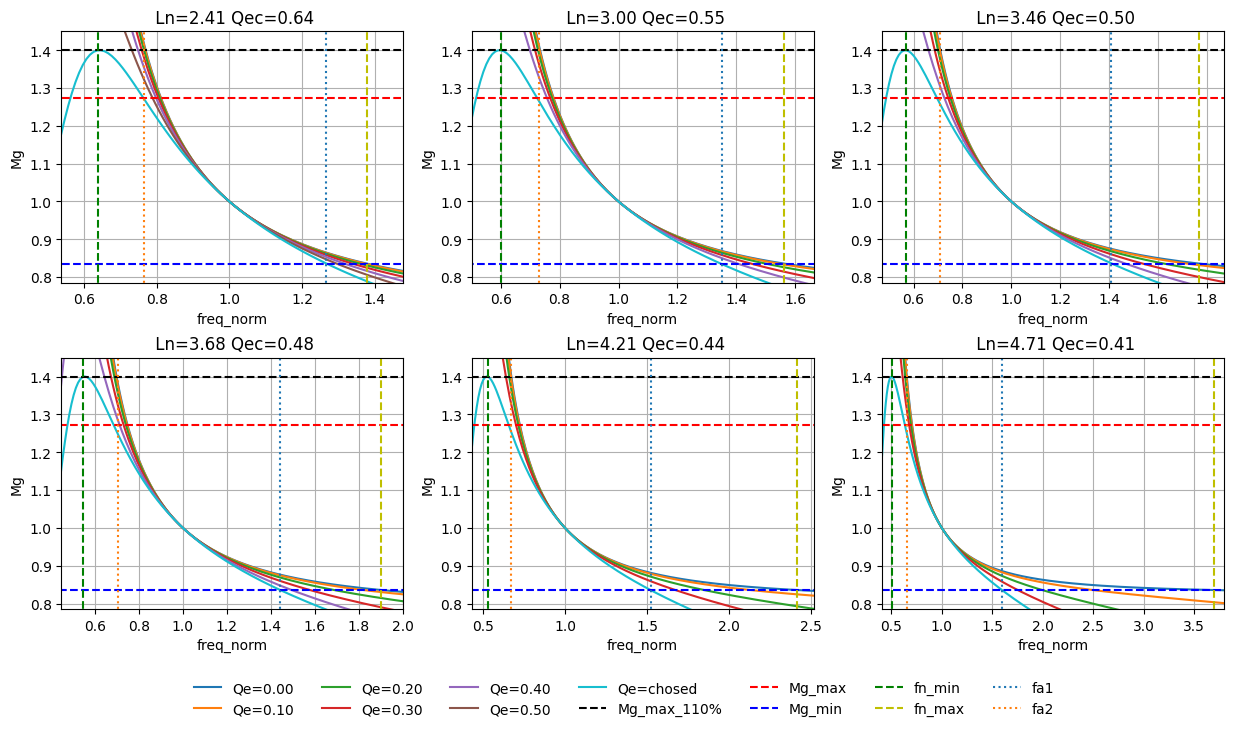

In [142]:
fig, axs = plt.subplots(2,3, figsize=(15,7.5))
axs= axs.flatten()
fig.subplots_adjust(wspace=0.2, hspace=0.3)
fnminplot, fnmaxplot =10,0
nmax = 0
for idx in range(len(dfllcv)):
  ax = axs[idx]
  dic = dfllcv.iloc[idx].to_dict()
  Lnc, Qec, Lm_uH, Lr_uH, Cr_nF,fn_min, fn_max,fsw_min, fsw_max, Ioe, Im, Ir, Mg_ape, Bpeak_max , Hmax  = dic.values()




  fn_min,fn_max = fsw_min/fnom, fsw_max/fnom
  if fn_min < fnminplot:
    fnminplot = fn_min
  if fn_max > fnmaxplot:
    fnmaxplot = fn_max

  freqn = np.arange(fn_min*0.7,fn_max*1.2,0.01)



  #Mg = calculate_Mg(Lnc,freqn, Qec)
  #print(Qec)
  #print(np.round(Qec, 1))
  Qecarr = np.arange(0,np.round(Qec, 1), 0.1)
  Qecarr = np.append(Qecarr, Qec)
  #print2(Qecarr)
  for Qe in Qecarr:
    lab = f"Qe={Qe:.2f}"
    c = round(Qe,3)
    if Qe == Qec:
        c = "chose"
        lab = f"Qe=chosed"
    nmax = max (nmax, len(Qecarr))
        

    Mg = calculate_Mg(Lnc,freqn, Qe)
    ax.plot(freqn, Mg, label = lab, c= colors [c])

  Qe = Qec
  Mg = calculate_Mg(Lnc,freqn, Qe)
  i= np.argmin (np.abs(Mg -mgmin))
  fa1 = freqn[i]
  Qe = 0
  Mg = calculate_Mg(Lnc,freqn, Qe)
  i= np.argmin (np.abs(Mg -mgmax110))
  fa2 = freqn[i]





  #print2(Qecarr)

  #ax.plot(freqn, Mg)
  #MgMax = Mg.max()
  #print2(MgMax)
  ax.plot([fn_min*0.8,fn_max*1.2 ], [mgmax110, mgmax110],
           label = "Mg_max_110%", linestyle ="--", c="k")
  ax.plot([fn_min*0.8,fn_max*1.2], [mgmax,mgmax ],
          label = "Mg_max", linestyle ="--", c="r")
  ax.plot([fn_min*0.8,fn_max*1.2 ], [mgmin, mgmin],
          label = "Mg_min", linestyle ="--", c="b")
  ax.plot([fn_min,fn_min ], [mgmin*0.8, mgmax110*1.2],
          label = "fn_min", linestyle ="--", c="g")
  ax.plot([fn_max,fn_max ], [mgmin*0.8, mgmax110*1.2],
          label = "fn_max", linestyle ="--", c="y")


  ax.plot([fa1,fa1 ], [mgmin*0.8, mgmax110*1.2],
          linestyle =":",label="fa1")
  ax.plot([fa2,fa2  ], [mgmin*0.8, mgmax110*1.2],
          linestyle =':',label="fa2")





  #ax.legend()
  ax.legend(loc='center', bbox_to_anchor=(1, 0.6), ncol=1)
  # ax.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)
  #plt.xscale("log")
  #plt.yscale("log")
  ax.set_title(f" Ln={Lnc:0.2f} Qec={Qec:0.2f}")
  ax.grid()#wich= "both")
  ax.set_xlabel("freq_norm")
  ax.set_ylabel("Mg")
  ax.set_ylim([ mgmin-0.1/2, mgmax110+0.1/2])
#for ax in axs:
  ax.set_xlim([fnminplot-0.1, fnmaxplot+0.1])

nmax = 0
target_ax = None

# Find the axis with the most lines
for ax in axs:
    if len(ax.lines) > nmax:
        nmax = len(ax.lines)
        target_ax = ax

# Remove all legends
i=0
for ax in axs:
    if i<3:
        #ax.set_xlabel("")
        pass
    if ax.legend_:
        ax.legend_.remove()
    i=i+1

# Add a single legend with 4 columns at bottom of figure
if target_ax:
    handles, labels = target_ax.get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.05),  # X=50%, Y=below figure
        ncol=7,
        frameon=False
    )



display (dfllcv)
plt.show()


In [143]:
Lnc, Qec = 3, 0.55

In [144]:
'''%%render
fn_min
fn_max
mgmax110
mg_max_close
mgmin
mg_min_close'''

'%%render\nfn_min\nfn_max\nmgmax110\nmg_max_close\nmgmin\nmg_min_close'

## 

In [145]:
f=np.arange(0.2,5,0.0001)
mg = calculate_Mg(Lnc,f, Qec)
Mg_c= mg.max()




i = np.abs(mg-mgmin).argmin()
i = np.abs(mg-mgmax110).argmin()
mg_max_close= mg[i]

fn_min= f[i]
#print2(fn_min)


#mg = calculate_Mg(Lnc,f, Qec)
mg = calculate_Mg(Lnc,f, 0)
i = np.abs(mg-mgmin).argmin()
fn_max = f[i]
mg_min_close= mg[i]

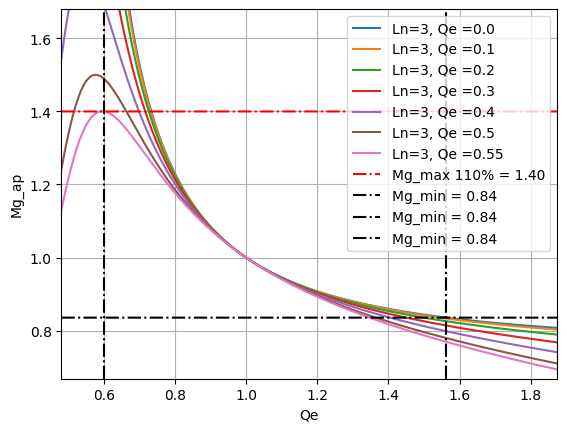

In [146]:
f=np.arange(0.2,5,0.0001)

for Qe in np.arange(0,Qec,0.1):
  mg = calculate_Mg(Lnc,f, Qe)
  plt.plot(f, mg, label = f"Ln={Lnc}, Qe ={Qe:.1f}")

mg = calculate_Mg(Lnc,f, Qec)

plt.plot(f, mg, label = f"Ln={Lnc}, Qe ={Qec}")
plt.plot(f,[mgmax110]*len(f) , c="r",
         linestyle="-.", label = f"Mg_max 110% = {mgmax110:.2f}")
plt.plot(f,[mgmin]*len(f) , c="k",
         linestyle="-.", label =f"Mg_min = {mgmin:.2f}")
plt.plot([fn_min, fn_min],[mgmin*0.8, mgmax110*1.2] , c="k",
         linestyle="-.", label =f"Mg_min = {mgmin:.2f}")
plt.plot([fn_max, fn_max],[mgmin*0.8, mgmax110*1.2] , c="k",
         linestyle="-.", label =f"Mg_min = {mgmin:.2f}")
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()#wich= "both")
plt.xlabel("Qe")
plt.ylabel("Mg_ap")
plt.xlim([fn_min*0.8,fn_max*1.2])
plt.ylim([mgmin*0.8, mgmax110*1.2])

plt.show()

In [147]:
%%render
# 100 load

Renom = 8*n**2*Vonom / (pi**2*Ionom)
Renom = round(Renom, 1)
# print2(Renom)

# 110% load

Re110 = 8*n**2*Vonom / (pi**2*Ionom*1.1)
#Re110 = np.round(Re110, 1)
# print2(Re110)
P_re_110 = (Vinnom/2)**2/Renom
#P_re_110 = np.round(P_re_110, 0)
# print2(P_re_110)

<IPython.core.display.Latex object>

In [148]:
%%render
Cr_nF= 1e9/ (2*pi * Qec* fnom*Renom) # nF




Cr = Cr_nF
Cr = round(Cr, 1)


Lr = 1/ ((2*pi * fnom)**2*Cr*1e-9)
Lr_uH = Lr *1e6 # uH
Lr_uH = round(Lr_uH, 1)
#Lr = 60 # choise

Lm = Lr*Lnc
#Lm = np.round(Lm, 1)
Lm_uH = Lm *1e6 # uH
Lm_uH = round(Lm_uH, 1)

<IPython.core.display.Latex object>

In [149]:
Qcal = sqrt(Lr/(Cr*1e-9))/Re110
Qcal , Qec

(0.6050555316531143, 0.55)

In [150]:
%%render
fsw_min = fn_min*fnom
fsw_min = np.round(fsw_min, 2)

fsw_max = fn_max*fnom
fsw_max = np.round(fsw_max, 2)




wmin= 2*pi * fsw_min
wmax= 2*pi * fsw_max
#print2(fsw_min, Lm)

# The RMS magnetizing current (Im) at fsw_min
Im = 2*np.sqrt(2)*n*Vonom/(pi*Lm*wmin)

# The primary-side RMS load current (Ioe) with a 110% overload i
Io= Ionom
Ioe= 1.1*pi*Io/(n*2*np.sqrt(2))


# The resonant circuit’s current (Ir)
Ir = sqrt(Im**2+Ioe**2)

<IPython.core.display.Latex object>

In [151]:
def LLC_from_Qe_Ln(Lnc, Qec):

  f=np.arange(0.2,5,0.0001)
  mg = calculate_Mg(Lnc,f, Qec)
  Mg_c= mg.max()




  i = np.abs(mg-mgmin).argmin()
  i = np.abs(mg-mgmax110).argmin()
  mg_max_close= mg[i]

  fn_min= f[i]
  #print2(fn_min)


  #mg = calculate_Mg(Lnc,f, Qec)
  mg = calculate_Mg(Lnc,f, 0)
  i = np.abs(mg-mgmin).argmin()
  fn_max = f[i]
  mg_min_close= mg[i]

  _='''
  mask1= f>fn_min
  mask2= f<fn_max
  mask = mask1 & mask2
  f2 = f[mask]
  mg2 = mg[mask]

  mask1 = mg2>mgmin
  mask2 = mg2<mgmax110
  mask = mask1 & mask2
  f2 = f2[mask]
  mg2 = mg2[mask]

  #print2(mg2)
  VmMax= mg2*2*np.sqrt(2)*Vinmax/(pi)
  #print2(Vinmax, VmMax, mg2)
  Ae = 211e-6
  fsw = f2*fnom
  Bpeak = VmMax/(4.44*fsw*n*Ae)
  # print2(fsw,  n, Ae)
  try:
    Bpeak_max = Bpeak.max()
  except:
    Bpeak_max = np.nan
  #print(Bpeak_max)
  '''






  # 100 load

  Renom = 8*n**2*Vonom / (pi**2*Ionom)
  Renom = np.round(Renom, 1)
  # print2(Renom)

  # 110% load

  Re110 = 8*n**2*Vonom / (pi**2*Ionom*1.1)
  #Re110 = np.round(Re110, 1)
  # print2(Re110)
  P_re_110 = (Vinnom/2)**2/Renom
  #P_re_110 = np.round(P_re_110, 0)
  # print2(P_re_110)



  Cr_nF= 1e9/ (2*pi * Qec* fnom*Renom)




  Cr = Cr_nF
  Cr = np.round(Cr, 1)


  Lr = 1/ ((2*pi * fnom)**2*Cr*1e-9)
  Lr_uH = Lr *1e6 # uH
  Lr_uH = np.round(Lr_uH, 1)
  #Lr = 60 # choise

  Lm = Lr*Lnc
  #Lm = np.round(Lm, 1)
  Lm_uH = Lm *1e6 # uH
  Lm_uH = np.round(Lm_uH, 1)








  fsw_min = fn_min*fnom
  fsw_min = np.round(fsw_min, 2)

  fsw_max = fn_max*fnom
  fsw_max = np.round(fsw_max, 2)




  wmin= 2*pi * fsw_min
  wmax= 2*pi * fsw_max
  #print2(fsw_min, Lm)

  # The RMS magnetizing current (Im) at fsw_min
  Im = 2*np.sqrt(2)*n*Vonom/(pi*Lm*wmin)

  # The primary-side RMS load current (Ioe) with a 110% overload i
  Io= Ionom
  Ioe= 1.1*pi*Io/(n*2*np.sqrt(2))


  # The resonant circuit’s current (Ir)
  Ir = np.sqrt(Im**2+Ioe**2)


  Ae = 211e-6
  le = 114e-3
  ue=188
  u0= 4*pi*1e-7

  Bpeak_max = 1000*(Im*u0*ue*n/le)
  Hmax = Im*n/le
  return Lm_uH,Lr_uH ,Cr_nF, fn_min, fn_max, fsw_min, fsw_max, Ioe ,  Im, Ir, Bpeak_max, Hmax
Lnc, Qec = 3, 0.5
Lm_uH,Lr_uH ,Cr_nF, fn_min, fn_max, fsw_min, fsw_max, Ioe ,  Im, Ir, Bpeak_max, Hmax = LLC_from_Qe_Ln(Lnc, Qec)
print2(Lm_uH,Lr_uH ,Cr_nF, fn_min, fn_max, fsw_min, fsw_max, Ioe ,  Im, Ir, Bpeak_max, Hmax)

Lm_uH = 59.5
Lr_uH = 19.8
Cr_nF = 127.83529565614086
fn_min = 0.5166999999999651
fn_max = 1.56219999999985
fsw_min = 51670.0
fsw_max = 156220.0
Ioe = 7.636205049959692
Im = 8.954624013440696
Ir = 11.768471387020433
Bpeak_max = 74.22841868156351
Hmax = 314.1973338049367


In [152]:
%%render
I_second= Im*n # Arms
Lseconday  =Lm_uH/n**2 # uH

<IPython.core.display.Latex object>

# chose componenents

In [153]:
#   print(fsw, VmMax, n, Ae)

In [154]:
# data.append( [Ln, Qe, Mg_ape])
#arr=np.array(arr)

In [155]:
# CHOSE QE110 automatically

freqn =  np.arange(0.15,1.7,0.01)
Lnarr = np.arange(1,10,0.01)
Qearr = np.arange(0.1,1,0.01)
data =[]
Ln, Qe = Lnc, Qec
for Ln in Lnarr:
  for Qe in Qearr:
    Mg = calculate_Mg(Ln,freqn, Qe)
    Mg_ape = Mg.max()
    data.append( [Ln, Qe, Mg_ape])

data= np.array(data).T
print(data.shape)

arr = data[2]
i = np.argmin(np.abs(arr-mgmax110))
Lnc, Qec, Mg_ape = data.T[i]
Lnc, Qec, Mg_ape, mgmax110


(3, 81000)


(np.float64(6.730000000000005),
 np.float64(0.32999999999999985),
 np.float64(1.3998556825506145),
 1.3998432748538014)

In [156]:
pd.DataFrame(data).T.min()

0    1.000000
1    0.100000
2    1.005641
dtype: float64

In [157]:
arr2=[]
#arr_ = arr-mgmax110
print2(mgmax110)
#data = np.array(data )
#data= copy(data_)
arr = data[2]
for i in np.argsort(np.abs(arr-mgmax110)):
  Lnc, Qec, Mg_ape = data.T[i]

  #print2(Lnc, Qec)#, Mg_ape, mgmax110)

  Lm_uH,Lr_uH ,Cr_nF, fn_min, fn_max, fsw_min, fsw_max, Ioe ,  Im, Ir, Bpeak_max , Hmax = LLC_from_Qe_Ln(Lnc, Qec)
  #print2(Bpeak_max)
  dic = {
    "Lnc": Lnc,
    "Qec": Qec,
    "Lm_uH": Lm_uH,
    "Lr_uH": Lr_uH,
    "Cr_nF": Cr_nF,
    "fn_min" : fn_min,
    "fn_max": fn_max,
    "fsw_min": fsw_min,
    "fsw_max": fsw_max,
    "Ioe": Ioe,
    "Im": Im,
    "Ir": Ir,
    "Mg_ape": Mg_ape,
    "Bpeak_max_mT":Bpeak_max,
    "Hmax": Hmax}
  if Mg_ape > mgmax110 and fn_min < fn_max and Lnc>=2 and Lnc < 10 :
    arr2.append(dic)
    if len(arr2) >=6:
      break
import pandas as pd
dfllcv = pd.DataFrame(arr2)
dfllcv = dfllcv.sort_values("Lnc")  .reset_index(drop = True )
dfllcv
# in https://www.tdk-electronics.tdk.com/download/540066/dbcde584d155cc270f5d5dbf1efec233/pdf-generaldefinitions.pdf
# page 3
_="""
1.2.2 Saturation magnetization BS
The saturation magnetization BS is defined as the maximum flux density attainable in a material (i.e.
for a very high field strength) at a given temperature; above this value BS, it is not possible to further
increase B(H) by further increasing H.
Technically, BS is defined as the flux density at a field strength of H = 1200 A/m. As is confirmed in
the actual magnetization curves in the chapter on “Materials”, the B(H) characteristic above
1200 A/m remains roughly constant (applies to all ferrites with high initial permeability, i.e. where
 1000)."""
_=""" In practice, to be safe, design for a bit less, like keeping
𝐻
H around 800–1000 A/m maximum, to
"""
dfprint = dfllcv.copy()
print(dfprint.T.reset_index().rename (columns = {"index":"cases"}).to_markdown(index = False)) # index = False

mgmax110 = 1.3998432748538014
| cases        |            0 |            1 |            2 |            3 |            4 |            5 |
|:-------------|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|
| Lnc          |      2.41    |      3       |      3.46    |      3.68    |      4.21    |      4.71    |
| Qec          |      0.64    |      0.55    |      0.5     |      0.48    |      0.44    |      0.41    |
| Lm_uH        |     61.1     |     65.4     |     68.6     |     70       |     73.4     |     76.5     |
| Lr_uH        |     25.4     |     21.8     |     19.8     |     19       |     17.4     |     16.2     |
| Cr_nF        |     99.8713  |    116.214   |    127.835   |    133.162   |    145.267   |    155.897   |
| fn_min       |      0.6375  |      0.6017  |      0.5707  |      0.5471  |      0.5324  |      0.5077  |
| fn_max       |      1.379   |      1.5622  |      1.7698  |      1.9035  |      2.4133  |      3.6928  |
| fsw_m

In [158]:
dfllcv.columns
dic={'Lnc':2, 'Qec':2, 'Lm_uH':1, 'Lr_uH':1, 'Cr_nF':1, 'fn_min':3, 'fn_max':3, 'fsw_min':0,
       'fsw_max':0, 'Ioe':1, 'Im':1, 'Ir':1, 'Mg_ape':1, 'Bpeak_max_mT':0, 'Hmax':0}
for k,v in dic.items():
  dfllcv[k] = dfllcv[k].round(v)

In [159]:
print(dfllcv.to_markdown(index=False))

|   Lnc |   Qec |   Lm_uH |   Lr_uH |   Cr_nF |   fn_min |   fn_max |   fsw_min |   fsw_max |   Ioe |   Im |   Ir |   Mg_ape |   Bpeak_max_mT |   Hmax |
|------:|------:|--------:|--------:|--------:|---------:|---------:|----------:|----------:|------:|-----:|-----:|---------:|---------------:|-------:|
|  2.41 |  0.64 |    61.1 |    25.4 |    99.9 |    0.637 |    1.379 |     63750 |    137900 |   7.6 |  7.1 | 10.4 |      1.4 |             59 |    248 |
|  3    |  0.55 |    65.4 |    21.8 |   116.2 |    0.602 |    1.562 |     60170 |    156220 |   7.6 |  7   | 10.4 |      1.4 |             58 |    245 |
|  3.46 |  0.5  |    68.6 |    19.8 |   127.8 |    0.571 |    1.77  |     57070 |    176980 |   7.6 |  7   | 10.4 |      1.4 |             58 |    247 |
|  3.68 |  0.48 |    70   |    19   |   133.2 |    0.547 |    1.903 |     54710 |    190350 |   7.6 |  7.2 | 10.5 |      1.4 |             60 |    252 |
|  4.21 |  0.44 |    73.4 |    17.4 |   145.3 |    0.532 |    2.413 |     53240 | 

In [160]:
# Vinmin, Vinnom, Vinmax = (360, 380, 400)


|   Lnc |   Qec |   Lm_uH |   Lr_uH |   Cr_nF |   fn_min |   fn_max |   fsw_min |   fsw_max |   Ioe |   Im |   Ir |   Mg_ape |   Bpeak_max_mT |   Hmax |
|------:|------:|--------:|--------:|--------:|---------:|---------:|----------:|----------:|------:|-----:|-----:|---------:|---------------:|-------:|
|  3.21 |  0.54 |    66.5 |    20.7 |   122.3 |    0.592 |    1.554 |     59190 |    155440 |   7.8 |  6.9 | 10.4 |      1.4 |            200 |    845 |

In [161]:
dfllcv

,Lnc,Qec,Lm_uH,Lr_uH,Cr_nF,fn_min,fn_max,fsw_min,fsw_max,Ioe,Im,Ir,Mg_ape,Bpeak_max_mT,Hmax
0,2.41,0.64,61.1,25.4,99.9,0.637,1.379,63750.0,137900.0,7.6,7.1,10.4,1.4,59.0,248.0
1,3.00,0.55,65.4,21.8,116.2,0.602,1.562,60170.0,156220.0,7.6,7.0,10.4,1.4,58.0,245.0
2,3.46,0.50,68.6,19.8,127.8,0.571,1.770,57070.0,176980.0,7.6,7.0,10.4,1.4,58.0,247.0
3,3.68,0.48,70.0,19.0,133.2,0.547,1.903,54710.0,190350.0,7.6,7.2,10.5,1.4,60.0,252.0
4,4.21,0.44,73.4,17.4,145.3,0.532,2.413,53240.0,241330.0,7.6,7.0,10.4,1.4,58.0,247.0
5,4.71,0.41,76.5,16.2,155.9,0.508,3.693,50770.0,369280.0,7.6,7.1,10.4,1.4,59.0,248.0


,Lnc,Qec,Lm_uH,Lr_uH,Cr_nF,fn_min,fn_max,fsw_min,fsw_max,Ioe,Im,Ir,Mg_ape,Bpeak_max_mT,Hmax
0,2.41,0.64,61.1,25.4,99.9,0.637,1.379,63750.0,137900.0,7.6,7.1,10.4,1.4,59.0,248.0
1,3.00,0.55,65.4,21.8,116.2,0.602,1.562,60170.0,156220.0,7.6,7.0,10.4,1.4,58.0,245.0
2,3.46,0.50,68.6,19.8,127.8,0.571,1.770,57070.0,176980.0,7.6,7.0,10.4,1.4,58.0,247.0
3,3.68,0.48,70.0,19.0,133.2,0.547,1.903,54710.0,190350.0,7.6,7.2,10.5,1.4,60.0,252.0
4,4.21,0.44,73.4,17.4,145.3,0.532,2.413,53240.0,241330.0,7.6,7.0,10.4,1.4,58.0,247.0
5,4.71,0.41,76.5,16.2,155.9,0.508,3.693,50770.0,369280.0,7.6,7.1,10.4,1.4,59.0,248.0


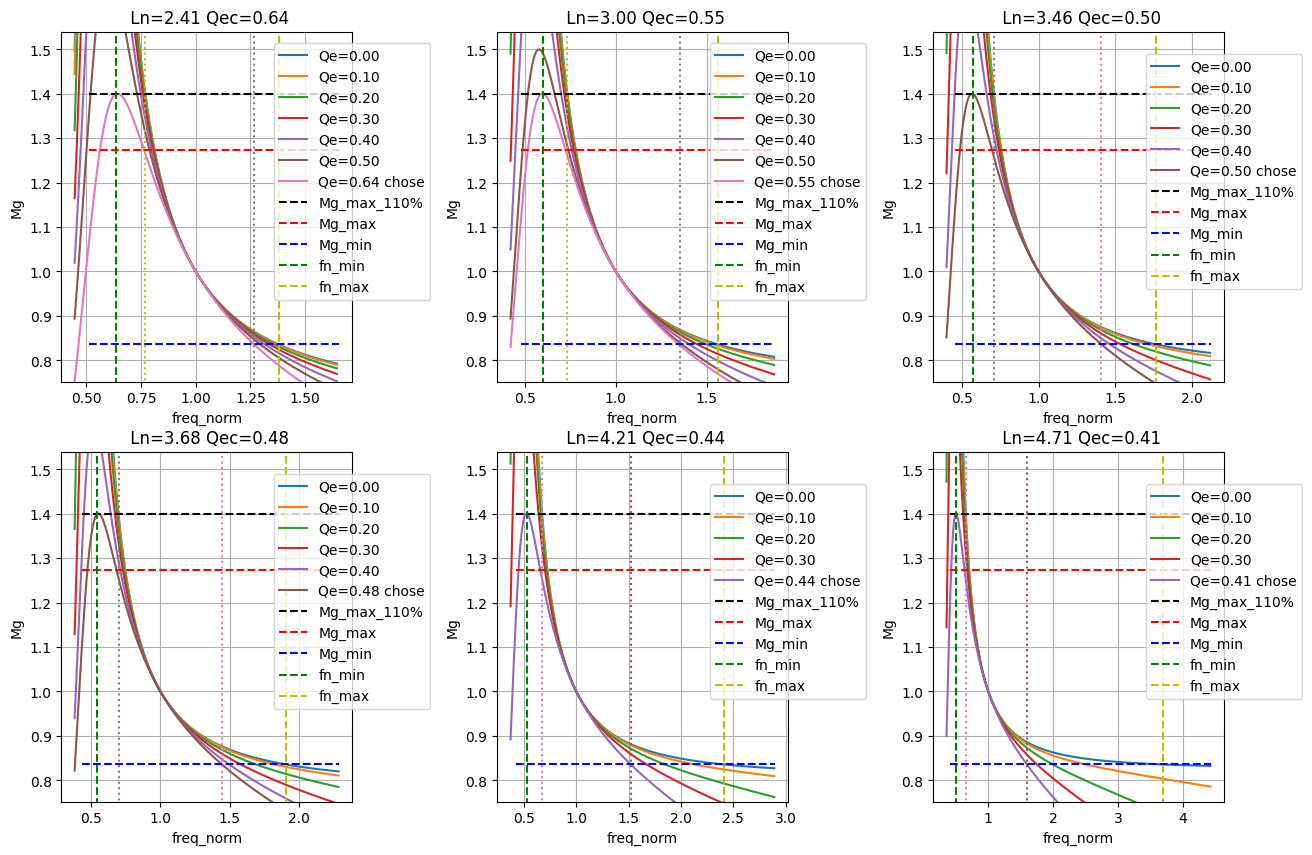

In [162]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
axs= axs.flatten()
fig.subplots_adjust(wspace=0.5, hspace=0.2)
fnminplot, fnmaxplot =10,0
for idx in range(len(dfllcv)):
  ax = axs[idx]
  dic = dfllcv.iloc[idx].to_dict()
  Lnc, Qec, Lm_uH, Lr_uH, Cr_nF,fn_min, fn_max,fsw_min, fsw_max, Ioe, Im, Ir, Mg_ape, Bpeak_max , Hmax  = dic.values()




  fn_min,fn_max = fsw_min/fnom, fsw_max/fnom
  if fn_min < fnminplot:
    fnminplot = fn_min
  if fn_max > fnmaxplot:
    fnmaxplot = fn_max

  freqn = np.arange(fn_min*0.7,fn_max*1.2,0.01)



  #Mg = calculate_Mg(Lnc,freqn, Qec)
  #print(Qec)
  #print(np.round(Qec, 1))
  Qecarr = np.arange(0,np.round(Qec, 1), 0.1)
  Qecarr = np.append(Qecarr, Qec)
  #print2(Qecarr)
  for Qe in Qecarr:
    lab = f"Qe={Qe:.2f}"
    if Qe == Qec:
      lab = f"Qe={Qe:.2f} chose"

    Mg = calculate_Mg(Lnc,freqn, Qe)
    ax.plot(freqn, Mg, label = lab)

  Qe = Qec
  Mg = calculate_Mg(Lnc,freqn, Qe)
  i= np.argmin (np.abs(Mg -mgmin))
  fa1 = freqn[i]
  Qe = 0
  Mg = calculate_Mg(Lnc,freqn, Qe)
  i= np.argmin (np.abs(Mg -mgmax110))
  fa2 = freqn[i]





  #print2(Qecarr)

  #ax.plot(freqn, Mg)
  #MgMax = Mg.max()
  #print2(MgMax)
  ax.plot([fn_min*0.8,fn_max*1.2 ], [mgmax110, mgmax110],
           label = "Mg_max_110%", linestyle ="--", c="k")
  ax.plot([fn_min*0.8,fn_max*1.2], [mgmax,mgmax ],
          label = "Mg_max", linestyle ="--", c="r")
  ax.plot([fn_min*0.8,fn_max*1.2 ], [mgmin, mgmin],
          label = "Mg_min", linestyle ="--", c="b")
  ax.plot([fn_min,fn_min ], [mgmin*0.8, mgmax110*1.2],
          label = "fn_min", linestyle ="--", c="g")
  ax.plot([fn_max,fn_max ], [mgmin*0.8, mgmax110*1.2],
          label = "fn_max", linestyle ="--", c="y")


  ax.plot([fa1,fa1 ], [mgmin*0.8, mgmax110*1.2],
          linestyle =":")
  ax.plot([fa2,fa2  ], [mgmin*0.8, mgmax110*1.2],
          linestyle =':')





  #ax.legend()
  ax.legend(loc='center', bbox_to_anchor=(1, 0.6), ncol=1)
  # ax.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)
  #plt.xscale("log")
  #plt.yscale("log")
  ax.set_title(f" Ln={Lnc:0.2f} Qec={Qec:0.2f}")
  ax.grid()#wich= "both")
  ax.set_xlabel("freq_norm")
  ax.set_ylabel("Mg")
  ax.set_ylim([ mgmin*0.9, mgmax110*1.1])
#for ax in axs:
#  ax.set_xlim([0.8*fnminplot, fnmaxplot*1.2])
display (dfllcv)
plt.show()


$ {\displaystyle E_{\text{rms}}={\frac {2\pi fNAB_{\text{peak}}}{\sqrt {2}}}\approx 4.44fNAB_{\text{peak}}} $

In [163]:
VmMax= mgmax110*2*np.sqrt(2)*n*Vonom/(pi)
print2(VmMax)

VmMax = 241.9779341594254


In [42]:
"""# the worst case
# the worst case
Ae = 211e-6
Bpeak_max = VmMax/(4.44*fsw_min*n*Ae)
print2(Bpeak_max)
Bpeak_max = 0.3548312181806373

[ ]
chose = dfllcv.iloc[0].to_dict()
chose
{'Lnc': 3.21,
Ae = 211e-6
Bpeak_max = VmMax/(4.44*fsw_min*n*Ae)
print2(Bpeak_max)"""

"# the worst case\n# the worst case\nAe = 211e-6\nBpeak_max = VmMax/(4.44*fsw_min*n*Ae)\nprint2(Bpeak_max)\nBpeak_max = 0.3548312181806373\n\n[ ]\nchose = dfllcv.iloc[0].to_dict()\nchose\n{'Lnc': 3.21,\nAe = 211e-6\nBpeak_max = VmMax/(4.44*fsw_min*n*Ae)\nprint2(Bpeak_max)"

In [43]:
chose = dfllcv.iloc[0].to_dict()
chose

{'Lnc': 2.41,
 'Qec': 0.64,
 'Lm_uH': 61.1,
 'Lr_uH': 25.4,
 'Cr_nF': 99.9,
 'fn_min': 0.637,
 'fn_max': 1.379,
 'fsw_min': 63750.0,
 'fsw_max': 137900.0,
 'Ioe': 7.6,
 'Im': 7.1,
 'Ir': 10.4,
 'Mg_ape': 1.4,
 'Bpeak_max_mT': 59.0,
 'Hmax': 248.0}

In [44]:
Lnc = chose ["Lnc"]
Qec = chose ["Qec"]
Lnc, Qec

(2.41, 0.64)

In [45]:
import pandas as pd
##########################
# Transformer core
##########################

# Fmailly TDK ETD 49/25/16

# datahseet Gapped core
# https://product.tdk.com/system/files/dam/doc/product/ferrite/ferrite/ferrite-acc/data_sheet/80/db/fer/etd_49_25_16.pdf
vals = [['0.2', '1035', '444', 'B66367G0200X1**'],
       ['0.5', '525', '225', 'B66367G0500X1**'],
       ['1', '314', '135', 'B66367G1000X1**'],
       ['1.5', '230', '100', 'B66367G1500X1**'],
       ['2', '188', '81', 'B66367G2000X1**']]
cols = ['g_mm', 'Al_nH', 'µe', 'ordering_code']
dftr = pd.DataFrame(vals, columns=cols)
dftr = dftr.astype({'g_mm': "float32", 'Al_nH': "float32", 'µe': "float32"})
dftr.ordering_code = dftr.ordering_code.str.replace ("**", "87") # material N87


Np = n # turns primary
Ns = 1 # turns secondary


dftr.loc[:, "Lp_uH"] = Np**2*dftr.Al_nH/1000
dftr.loc[:, "Ls_uH"] = Ns**2*dftr.Al_nH/1000
print("# Transformer Gapped core")
print(dftr.to_markdown())


# Transformer Gapped core
|    |   g_mm |   Al_nH |   µe | ordering_code   |   Lp_uH |   Ls_uH |
|---:|-------:|--------:|-----:|:----------------|--------:|--------:|
|  0 |    0.2 |    1035 |  444 | B66367G0200X187 |  16.56  |   1.035 |
|  1 |    0.5 |     525 |  225 | B66367G0500X187 |   8.4   |   0.525 |
|  2 |    1   |     314 |  135 | B66367G1000X187 |   5.024 |   0.314 |
|  3 |    1.5 |     230 |  100 | B66367G1500X187 |   3.68  |   0.23  |
|  4 |    2   |     188 |   81 | B66367G2000X187 |   3.008 |   0.188 |


In [46]:
Ae=211e-6; le = 114e-3
u0= 4*pi*1e-7
dftr["B_peak0"]= (sqrt(2)*Im*dftr["Lp_uH"]*1e-6)/(n*Ae)
dftr["B_peak1"]= sqrt(2)*Im*dftr["µe"]*u0*n/le
# Bpeak_max = 1000*(Im*u0*ue*n/le)
dftr

,g_mm,Al_nH,µe,ordering_code,Lp_uH,Ls_uH,B_peak0,B_peak1
0,0.2,1035.0,444.0,B66367G0200X187,16.559999,1.035,0.197011,0.196572
1,0.5,525.0,225.0,B66367G0500X187,8.400000,0.525,0.099933,0.099614
2,1.0,314.0,135.0,B66367G1000X187,5.024000,0.314,0.059770,0.059768
3,1.5,230.0,100.0,B66367G1500X187,3.680000,0.230,0.043780,0.044273
4,2.0,188.0,81.0,B66367G2000X187,3.008000,0.188,0.035786,0.035861


In [47]:
Lm_design =dftr.loc[2, "Lp_uH"]
Lm_design

np.float32(5.024)

In [ ]:
k3_100=460; k4_100=-0.873
le=114e-3
Ae =211e-6
# see
# https://www.tdk-electronics.tdk.com/download/531516/f119bbe0ab3d6dd73ae31c6fa9dcf6b9/pdf-ecoresgeneralinformation.pdf
#https://product.tdk.com/system/files/dam/doc/product/ferrite/ferrite/ferrite-acc/data_sheet/80/db/fer/etd_49_25_16.pdf
Idc100= (0.9*dftr["Al_nH"]/k3_100)**(1/k4_100)
IdcN= (Idc100*n).rename('IdcN')
dftr["IdcN"]= IdcN



dftr["B_peak0"]= (sqrt(2)*Im*dftr["Lp_uH"]*1e-6)/(n*Ae)



dftr["B_peak1"]= sqrt(2)*Im*dftr["µe"]*u0*n/le


dftr

In [ ]:
%%render
Lm_design# µH
Lr = Lm_design/Lnc# µH
leakage =3 # pourcent
Lrleak = Lm_design*leakage/100 # µH
Lrr =Lr -Lrleak # µH

In [ ]:
##########################
# Lr : resonance inductor
##########################
# familly ETD 34/17/11
# https://product.tdk.com/system/files/dam/doc/product/ferrite/ferrite/ferrite-acc/data_sheet/80/db/fer/etd_34_17_11.pdf

vals =[['0.10', '790', '508', 'B66361G0100X1**'],
       ['0.20', '482', '310', 'B66361G0200X1**'],
       ['0.50', '251', '161', 'B66361G0500X1**'],
       ['1.00', '153', '98', 'B66361G1000X1**'],
       ['2.50', '80', '50', 'B66361G2500X1**']]
cols = ['g_mm', 'Al_nH', 'µe', 'ordering_code']
dflr = pd.DataFrame(vals, columns=cols)


dflr.ordering_code = dflr.ordering_code.str.replace ("**", "87") # material N87


t= """Material	Al_nH	µe	ordering_code
N27	2400	1540	B66361G0000X127
N87	2600	1670	B66361G0000X187
N97	2650	1710	B66361G0000X197
N95	3300	2170	B66361G0000X195""".split("\n")
t = [x.split("\t") for x in t]
dflrnog = pd.DataFrame(t[1:], columns=t[0])

dflr = pd.concat([dflr, dflrnog], axis = 0)

dflr = dflr.astype({'g_mm': "float32", 'Al_nH': "float32", 'µe': "float32"})
dflr

In [ ]:
Lrr

In [ ]:
dflr2= dflr[['g_mm', 'Al_nH', 'µe', 'ordering_code']].reset_index(drop = True)
for i in dflr2.index:
  Al_nH = dflr2.loc[i, "Al_nH"]
  Nr = np.abs(np.array([Al_nH*Nr**2/1000  for Nr in range(20)])-Lrr).argmin()
  dflr2.loc[i, "Nr"] = Nr
dflr2["Lr"] = dflr2["Al_nH"]*dflr2["Nr"]**2/1000

print(Lr)
dflr2

In [ ]:
Ae = 97.1e-6
le=78.6e-3
dflr2["Al_nH_cal"]=1e9*dflr2["µe"]*u0*Ae/le
dflr2[["Al_nH", "Al_nH_cal"]]

In [ ]:

dflr2["B_peak0"]= (sqrt(2)*Ir*dflr2["Lr"]*1e-6)/(dflr2["Nr"]*Ae)



dflr2["B_peak1"]= sqrt(2)*Ir*dflr2["µe"]*u0*dflr2["Nr"]/le

dflr2

$$
L = \frac{n^2 \mu_0 \mu_e A_e}{l}
$$


i verify all result 100%
<br>
${R}_{mc} ~=~ \frac{l_e}{ \mu_c \mu_0 A}$
<br>
${R}_{mg} ~=~ \frac{g}{ \mu_0 A}$
<br>
$ni ~=~ \Phi (\mathcal{R}_{mc}~+~\mathcal{R}_{mg})$
<br>
$L ~=~ \frac{n \Phi}{i}$
<br>
$B ~=~ \frac{\Phi}{A}$
<br>
$B = \mu_0 \dfrac{ni}{\dfrac{l_e}{\mu_c} + g}$
<br>
$\Phi$ is the flux per turn (in Weber)
<br>
$\lambda = n \Phi$ : total flux linkage (in Weber-turns)
<br>
$H_\text{core} = \frac{B}{\mu_0 \mu_c}, \quad H_\text{gap} = \frac{B}{\mu_0}$

<br>

$
\mu_e
= \frac{1}{\displaystyle \frac{1}{\mu_c} + \frac{g}{l_e}}
= \frac{\mu_c}{1 + \displaystyle\frac{\mu_c\,g}{l_e}}
= \frac{\mu_c\,l_e}{\,l_e + \mu_c\,g\,}.
$

<br>
$\mu_c$ (relative permeability of material)
<br>
$\mu_e$ (effective permeability — but not appearing directly here)
<br>
$B = \frac{\Phi}{A} = \frac{\mu_0 \mu_e}{l_e} ni =\mu_0 \mu_eH  $


https://www.allaboutcircuits.com/technical-articles/understanding-inductors-with-gapped-cores/

<br>
By Gauss’s law for magnetism,
$
\nabla \cdot \mathbf{B} = 0
\quad\Longrightarrow\quad
\oint_{S} \mathbf{B}\!\cdot\!d\mathbf{A} = 0,
$
which implies
$
B_{\mathrm{core}}\,A = B_{\mathrm{gap}}\,A
\quad\Longrightarrow\quad
B_{\mathrm{core}} = B_{\mathrm{gap}} = \frac{\Phi}{A}.
$


$B = \frac{\mu_0 \mu_e}{l_e} ni =\mu_0 \mu_eH$

In [ ]:
u0= 4*pi*1e-7
le = 78.6e-3
H_peak= sqrt(2)*dflr2["Nr"]*Ir/le
dflr2["B_peak"] =u0*dflr2["µe"]*H_peak

print(Lr)
dflr2 =dflr2.sort_values("B_peak").reset_index(drop= True)
dflr2

In [ ]:

k3_25, k4_25, k3_100, k4_100 = 240, -0.796 , 222 , -0.873
# see
# https://www.tdk-electronics.tdk.com/download/531516/f119bbe0ab3d6dd73ae31c6fa9dcf6b9/pdf-ecoresgeneralinformation.pdf
# https://product.tdk.com/system/files/dam/doc/product/ferrite/ferrite/ferrite-acc/data_sheet/80/db/fer/etd_34_17_11.pdf
Idc100= (0.9*dflr2["Al_nH"]/k3_100)**(1/k4_100)
IdcN= (Idc100*dflr2["Nr"]).rename('IdcN')
dflr2["IdcN"]= IdcN
print(Ir)
dflr2

In [ ]:
dflr2.head(1)

In [ ]:
dic = dflr2.iloc[0,:].to_dict()

In [ ]:
%%render
Lr_design_core = dic["Lr"] #nF

In [ ]:
%%render
Lr_design = Lr_design_core +  Lrleak # nF

In [ ]:
Lm_design

In [ ]:
%%render
Cr_design= 1/((fnom *2*pi)**2 *Lr_design*1e-6*1e-9 ) #nF

In [ ]:
print(round(Cr_design), "nF 400V 50kHz-150kHz", round(Ir,1), "Arms")

In [ ]:
# 4*33 =132 clause to 128
# https://www.mouser.es/ProductDetail/EPCOS-TDK/B32672L1333J?qs=vht8qxFUkGz11LfwwLq5EA%3D%3D
# https://product.tdk.com/system/files/dam/doc/product/capacitor/film/mkp_mfp/data_sheet/20/20/db/fc_2009/mkp_b32671l_672l.pdf
# B32672L1333 600vac 1600vdc
# @100kHz 200VAC 4Arms
# problem with voltage
# Idea show that the current with sim
# try with 22nF B32672L1223
# https://www.mouser.fr/ProductDetail/EPCOS-TDK/B32672L1223J000?qs=oXiPBR%252BVyFxQO3LkZZrRmQ%3D%3D
# try with kimet
# https://eu.mouser.com/ProductDetail/KEMET/R75PI2330CK00J?qs=sGAEpiMZZMsh%252B1woXyUXj9iQBquZQqu4CEgkifEmbjQ%3D

In [ ]:
%%render
Cr_design_choice= 6*22 # nF

In [ ]:
%%render
omega_sw_min = fsw_min*2*pi # rad/s
V_cr_rms = Ir/(Cr_design_choice*1e-9*omega_sw_min) # Vrms

In [ ]:
%%render
fr = 1/(2*pi*sqrt(Lr_design*1e-6*Cr_design_choice*1e-9)) # Hz

In [ ]:
%%render
Ln =  Lm_design / Lr_design

In [ ]:
Lnc, Qec

In [ ]:
fsw_max

In [ ]:
fn=np.arange(0.1,5,0.01)
i = np.argmin(np.abs(mgmax110-calculate_Mg(Lnc,fn, Qec)))
fnmin = fn[i]

i = np.argmin(np.abs(mgmin-calculate_Mg(Lnc,fn, 0)))
fnmax = fn[i]



In [ ]:
%%render
fsw_max = fnmax *fr # kHz
fsw_min = fnmin *fr # kHz

In [ ]:

Vonom * Ionom

In [ ]:
%%render
Renom =8*n**2*Vonom / (pi**2*Ionom) #ohm
#Re110 = 8*n**2*Vonom / (pi**2*Ionom*1.1)
Qe_choice = sqrt((Lr_design*1e-6)/(Cr_design_choice*1e-9))/Renom# IU

In [ ]:
def Q_to_P_I(Qe, L = Lr_design*1e-6, C= Cr_design_choice*1e-9, Pow= Power, U= Vonom, rate = n):
  if Qe == 0:
    return np.inf,0,0
  #Qe = sqrt(L/C)/R
  Rp = sqrt(L/C)/Qe # primary
  R = Rp/rate**2 # secondary
  # Pow= R*I**2
  P= U**2/R
  # print("P", P, "U",U,"R")
  I= P/U
  return R, I, P
#Q_to_P_I(0.5), Q_to_P_I(0)

In [ ]:
%%render
Lnc =  Lm_design / Lr_design
Ln = Lnc

In [ ]:
f=np.arange(0.6,5,0.0001)
mg = calculate_Mg(Lnc,f, Qec)
Mg_c= mg.max()




i = np.abs(mg-mgmin).argmin()
i = np.abs(mg-mgmax110).argmin()
mg_max_close= mg[i]

fnmin= f[i]
#print2(fn_min)


#mg = calculate_Mg(Lnc,f, Qec)
mg = calculate_Mg(Lnc,f, 0)
i = np.abs(mg-mgmin).argmin()
fnmax = f[i]
mg_min_close= mg[i]

In [ ]:
ax = plt.subplot()


Qe = Qec
Mg = calculate_Mg(Ln,fn, Qe)
i= np.argmin (np.abs(Mg -mgmin))
fa1 = freqn[i]
Qe = 0
Mg = calculate_Mg(Lnc,fn, Qe)
i= np.argmin (np.abs(Mg -mgmax110))
fa2 = freqn[i]













Qecarr = np.arange(0,np.round(Qec, 1), 0.1)
Qecarr = np.append(Qecarr, Qec)
#print2(Qecarr)
for Qe in Qecarr:
  R, I, P = Q_to_P_I(Qe)
  lab = f"Qe={Qe:.2f} Power={P/1000:.2f}kW Iout={I:.0f}A Ro={R:0.3f}"
  if Qe == Qec:
    pass
    #lab = f"Qe={Qe:.2f} chose"
  Mg = calculate_Mg(Lnc,fn, Qe)
  ax.plot(fn, Mg, label = lab)

Qe = Qec
Mg = calculate_Mg(Lnc,freqn, Qe)
i= np.argmin (np.abs(Mg -mgmin))
fa1 = freqn[i]
Qe = 0
Mg = calculate_Mg(Lnc,freqn, Qe)
i= np.argmin (np.abs(Mg -mgmax110))
fa2 = freqn[i]




#print2(Qecarr)

#ax.plot(freqn, Mg)
#MgMax = Mg.max()
#print2(MgMax)
ax.plot([fnmin*0.8,fnmax*1.2 ], [mgmax110, mgmax110],
label = "Mg_max_110%", linestyle ="--", c="k")
ax.plot([fnmin*0.8,fnmax*1.2], [mgmax,mgmax ],
label = "Mg_max", linestyle ="--", c="r")
ax.plot([fnmin*0.8,fnmax*1.2 ], [mgmin, mgmin],
label = "Mg_min", linestyle ="--", c="b")
ax.plot([fnmin,fnmin ], [mgmin*0.8, mgmax110*1.2],
label = "fn_min", linestyle ="--", c="g")
ax.plot([fnmax,fnmax ], [mgmin*0.8, mgmax110*1.2],
label = "fn_max", linestyle ="--", c="y")


ax.plot([fa1,fa1 ], [mgmin*0.8, mgmax110*1.2],
linestyle =":")
ax.plot([fa2,fa2  ], [mgmin*0.8, mgmax110*1.2],
linestyle =':')





#ax.legend()
ax.legend(loc='center', bbox_to_anchor=(1, 0.6), ncol=1)
# ax.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)
#plt.xscale("log")
#plt.yscale("log")
ax.set_title(f" Ln={Lnc:0.2f} Qe_max={Qec:0.2f}")
ax.grid()#wich= "both")
ax.set_xlabel("freq_norm")
ax.set_ylabel("Mg")
ax.set_ylim([ mgmin*0.95, mgmax110*1.05])
ax.set_xlim([0.9*fnmin, 1.05*fnmax])


# Create second x-axis

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ticks = ax.get_xticks()
tick_labels = np.round(ticks * fr / 1000, 1)  # convert to kHz
ax2.set_xticklabels(tick_labels)
ax2.set_xlabel("F-sw (kHz)")
plt.show()


"""
# Add a second x-axis at the *bottom* with transformation
def forward(x):
    return x * fr / 1000  # from normalized freq to kHz

def inverse(x):
    return x * 1000 / fr  # from kHz to normalized freq

secax = ax.secondary_xaxis('bottom', functions=(forward, inverse))
secax.spines['bottom'].set_position(('outward', 50))  # 10 points = 0.1 inch
secax.set_xlabel("F-sw (kHz")
"""
plt.show()

In [ ]:
mgmin , mgmax, mgmax110

In [ ]:
%%render
I_second= Im*n # Arms

In [ ]:
%%render
Ioe= 1.1*pi*Ionom/(n*2*np.sqrt(2))

In [ ]:
%%render
Lseconday  =Lm_design/n**2

In [ ]:
# https://www.ti.com/document-viewer/lit/html/SSZTB75

In [ ]:
# https://www.iscve.org.uk/wp-content/uploads/EngineeringNote-16.2-rectifier-filter-capacitors.pdf

### Derivation of the DC-Link Capacitor Formula

In a full-wave rectifier, the capacitor charges to the peak of the AC voltage and discharges when the input voltage drops below the capacitor voltage. The goal is to limit the voltage ripple (\( \Delta V \)) during the discharge phase.

Assuming:
- \( I_o \): Output DC current (A)
- \( \Delta V \): Peak-to-peak voltage ripple (V)
- \( f \): Line frequency (Hz)

The capacitor discharges over half the period of the AC cycle, i.e., time \( \Delta t = \frac{1}{2f} \). The charge lost during this time is:

$$
\Delta Q = I_o \cdot \Delta t = I_o \cdot \frac{1}{2f}
$$

Since \( \Delta Q = C \cdot \Delta V \), we have:

$$
C \cdot \Delta V = \frac{I_o}{2f}
$$

Solving for \( C \):

$$
C = \frac{I_o}{2f \cdot \Delta V}
$$

This formula provides the minimum capacitance required to maintain the voltage ripple within the desired limits.


In [ ]:
%%render
Io_110= Io*110/100 #A
Vpp= 0.1 # V
C_out = 1e3*Io_110/(2*fsw_min*Vpp) # mF
Irms_Co= Io_110/sqrt(2) # Arms

In [ ]:
%%render
Io_110= 160#A
Vpp= 0.1 # V
C_out = 1e3*Io_110/(2*(145e3)*Vpp) # mF
Irms_Co= Io_110/sqrt(2) # Arms

In [ ]:
mgmin

In [ ]:
%%render
fsw_max=fnmax *fr
fsw_min= fnmin *fr

In [ ]:
" ".join([str(round(f/1000, 2))+"k" for f in np.linspace(fsw_min, fsw_max, 11)])

In [ ]:
%%render
V_mgmax = mgmax*(Vinmin/2)/n
V_mgmax110 = mgmax110*(Vinmin/2)/n

In [ ]:
%%render
fsw_min # Hz
fr  # Hz
fsw_max # Hz
Lm_design # uH
Lr_design_core # uH
Lrleak # uH
Cr_design_choice # nF
Lr_design # uH
n # Transormer ratio
Ir  # Arms
Im # Arms
I_second # Arms
Ionom # A



In [ ]:
Lr_design

# ANNEXES

In [ ]:
Qecarr = np.arange(0.1,np.round(Qec, 1), 0.1)
Qecarr = np.append(Qecarr, Qec)
Qecarr = np.append(0.01,Qecarr)
for Qe in Qecarr:
  R, I, P = Q_to_P_I(Qe)
  print(Qe, R, I)

In [ ]:
Qecarr

In [ ]:
np.set_printoptions(legacy='1.25')
print([round(Q_to_P_I(Qe)[0],3) for Qe in Qecarr])